In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('students.csv') 
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [3]:
print(df.info())
print(df.describe())
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
mode_value = df['Teacher_Quality'].mode()[0]
mode_value = df['Parental_Education_Level'].mode()[0]
mode_value = df['Distance_from_Home'].mode()[0]
df['Teacher_Quality'].fillna(mode_value, inplace=True)
df['Parental_Education_Level'].fillna(mode_value, inplace=True)
df['Distance_from_Home'].fillna(mode_value, inplace=True)
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

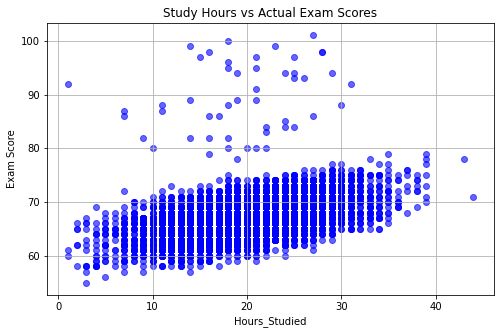

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue', alpha=0.6)
plt.xlabel('Hours_Studied')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Actual Exam Scores')
plt.grid(True)
plt.show()


In [6]:
print(df.corr())


                   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.009908     0.010977         0.024846   
Attendance             -0.009908    1.000000    -0.015918        -0.020186   
Sleep_Hours             0.010977   -0.015918     1.000000        -0.021750   
Previous_Scores         0.024846   -0.020186    -0.021750         1.000000   
Tutoring_Sessions      -0.014282    0.014324    -0.012216        -0.013122   
Physical_Activity       0.004624   -0.022435    -0.000378        -0.011274   
Exam_Score              0.445455    0.581072    -0.017022         0.175079   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.014282           0.004624    0.445455  
Attendance                  0.014324          -0.022435    0.581072  
Sleep_Hours                -0.012216          -0.000378   -0.017022  
Previous_Scores            -0.013122          -0.011274    0.175079  
Tutoring_Sessions        

In [7]:
features = [
    'Previous_Scores', 'Hours_Studied', 'Attendance', 'Parental_Involvement',
    'Motivation_Level', 'Tutoring_Sessions', 'Sleep_Hours', 'Access_to_Resources',
    'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
    'Parental_Education_Level', 'Internet_Access'
]
target = 'Exam_Score'


In [8]:
df_encoded = pd.get_dummies(df[features], drop_first=True)


In [9]:
from sklearn.model_selection import train_test_split

X = df_encoded
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)


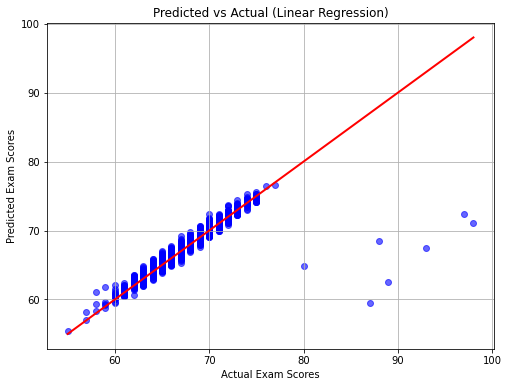

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lin, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Predicted vs Actual (Linear Regression)')
plt.grid(True)
plt.show()


In [12]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)


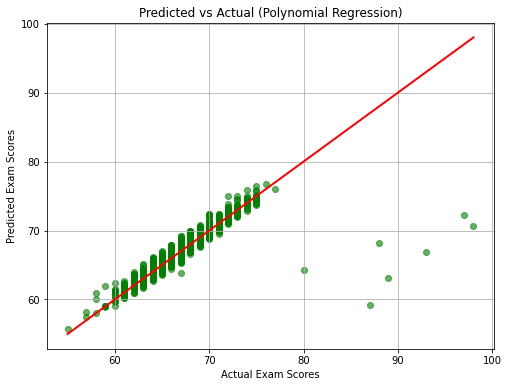

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Predicted vs Actual (Polynomial Regression)')
plt.grid(True)
plt.show()


In [14]:
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R2:", r2_score(y_test, y_pred_lin))

print("\nPolynomial Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R2:", r2_score(y_test, y_pred_poly))


Linear Regression:
MSE: 3.487414289351698
R2: 0.7532793485141731

Polynomial Regression:
MSE: 3.7116821669641173
R2: 0.7374132906612744


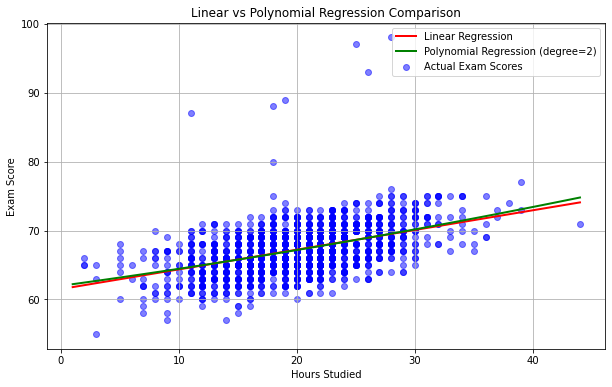

In [17]:

X_single = df[['Hours_Studied']]
y = df['Exam_Score']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_single, y, test_size=0.2, random_state=42)

lin_reg_simple = LinearRegression()
lin_reg_simple.fit(X_train_s, y_train_s)


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_s)

poly_reg_simple = LinearRegression()
poly_reg_simple.fit(X_train_poly, y_train_s)


X_plot = np.linspace(X_single['Hours_Studied'].min(), X_single['Hours_Studied'].max(), 100).reshape(-1,1)


y_plot_lin = lin_reg_simple.predict(X_plot)
y_plot_poly = poly_reg_simple.predict(poly.transform(X_plot))


plt.figure(figsize=(10,6))


plt.scatter(X_test_s, y_test_s, color='blue', alpha=0.5, label='Actual Exam Scores')


plt.plot(X_plot, y_plot_lin, color='red', linewidth=2, label='Linear Regression')


plt.plot(X_plot, y_plot_poly, color='green', linewidth=2, label='Polynomial Regression (degree=2)')

plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear vs Polynomial Regression Comparison')
plt.legend()
plt.grid(True)
plt.show()
